# Mengimpor datasets

In [1]:
# Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Documents/diabetes.csv')  # membaca dataframe
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",No diabetes
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",No diabetes


# Preprocessing data

In [3]:
df.isna().sum()  # cek missing value

patient_number     0
cholesterol        0
glucose            0
hdl_chol           0
chol_hdl_ratio     0
age                0
gender             0
height             0
weight             0
bmi                0
systolic_bp        0
diastolic_bp       0
waist              0
hip                0
waist_hip_ratio    0
diabetes           0
dtype: int64

In [4]:
df.shape

(390, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patient_number   390 non-null    int64 
 1   cholesterol      390 non-null    int64 
 2   glucose          390 non-null    int64 
 3   hdl_chol         390 non-null    int64 
 4   chol_hdl_ratio   390 non-null    object
 5   age              390 non-null    int64 
 6   gender           390 non-null    object
 7   height           390 non-null    int64 
 8   weight           390 non-null    int64 
 9   bmi              390 non-null    object
 10  systolic_bp      390 non-null    int64 
 11  diastolic_bp     390 non-null    int64 
 12  waist            390 non-null    int64 
 13  hip              390 non-null    int64 
 14  waist_hip_ratio  390 non-null    object
 15  diabetes         390 non-null    object
dtypes: int64(11), object(5)
memory usage: 48.9+ KB


In [6]:
df['chol_hdl_ratio']   = df['chol_hdl_ratio'].replace(',','.', regex=True)
df['bmi']              = df['bmi'].replace(',','.', regex=True)
df['waist_hip_ratio']  = df['waist_hip_ratio'].replace(',','.', regex=True)

In [7]:
df['chol_hdl_ratio']   = df['chol_hdl_ratio'].astype(float)
df['bmi']              = df['bmi'].astype(float)
df['waist_hip_ratio']  = df['waist_hip_ratio'].astype(float)

In [8]:
df.describe()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,195.500000,207.230769,107.338462,50.266667,4.524615,46.774359,65.951282,177.407692,28.775641,137.133333,83.289744,37.869231,42.992308,0.881385
std,112.727548,44.666005,53.798188,17.279069,1.736634,16.435911,3.918867,40.407824,6.600915,22.859528,13.498192,5.760947,5.664342,0.073212
min,1.000000,78.000000,48.000000,12.000000,1.500000,19.000000,52.000000,99.000000,15.200000,90.000000,48.000000,26.000000,30.000000,0.680000
25%,98.250000,179.000000,81.000000,38.000000,3.200000,34.000000,63.000000,150.250000,24.100000,122.000000,75.000000,33.000000,39.000000,0.830000
50%,195.500000,203.000000,90.000000,46.000000,4.200000,44.500000,66.000000,173.000000,27.800000,136.000000,82.000000,37.000000,42.000000,0.880000
75%,292.750000,229.000000,107.750000,59.000000,5.400000,60.000000,69.000000,200.000000,32.275000,148.000000,90.000000,41.000000,46.000000,0.930000
max,390.000000,443.000000,385.000000,120.000000,19.300000,92.000000,76.000000,325.000000,55.800000,250.000000,124.000000,56.000000,64.000000,1.140000


In [9]:
df.describe(include=['object'])

,gender,diabetes
count,390,390
unique,2,2
top,female,No diabetes
freq,228,330


In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
# Encode kolom label diabetes

diabetes_encode = {'No diabetes':0, 'Diabetes':1}
df['diabetes'] = df['diabetes'].map(diabetes_encode)

In [12]:
# Encode kolom gender

gender = df['gender'].values.reshape(-1,1)

one_hot = OneHotEncoder()
gender = one_hot.fit_transform(gender).toarray()

In [13]:
one_hot.categories_

[array(['female', 'male'], dtype=object)]

In [14]:
df_gender = pd.DataFrame(gender, columns=[str(i) for i in range(gender.shape[1])])

In [15]:
df = pd.concat([df_gender, df], 1)

In [16]:
df.drop(columns=['gender', 'patient_number'], axis=1, inplace=True)

In [17]:
df = df.rename(columns = {'0' : 'female', '1' : 'male'})

In [18]:
df['female'] = df['female'].astype(int)
df['male']   = df['male'].astype(int)

In [19]:
df.head()

,female,male,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,0,193,77,49,3.9,19,61,119,22.5,118,70,32,38,0.84,0
1,1,0,146,79,41,3.6,19,60,135,26.4,108,58,33,40,0.83,0
2,1,0,217,75,54,4.0,20,67,187,29.3,110,72,40,45,0.89,0
3,1,0,226,97,70,3.2,20,64,114,19.6,122,64,31,39,0.79,0
4,1,0,164,91,67,2.4,20,70,141,20.2,122,86,32,39,0.82,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   female           390 non-null    int32  
 1   male             390 non-null    int32  
 2   cholesterol      390 non-null    int64  
 3   glucose          390 non-null    int64  
 4   hdl_chol         390 non-null    int64  
 5   chol_hdl_ratio   390 non-null    float64
 6   age              390 non-null    int64  
 7   height           390 non-null    int64  
 8   weight           390 non-null    int64  
 9   bmi              390 non-null    float64
 10  systolic_bp      390 non-null    int64  
 11  diastolic_bp     390 non-null    int64  
 12  waist            390 non-null    int64  
 13  hip              390 non-null    int64  
 14  waist_hip_ratio  390 non-null    float64
 15  diabetes         390 non-null    int64  
dtypes: float64(3), int32(2), int64(11)
memory usage: 45.8 KB


In [21]:
df.diabetes.value_counts()

0    330
1     60
Name: diabetes, dtype: int64

# Membagi data

In [22]:
X = df.drop('diabetes', 1)
y = df['diabetes']

# Normalisasi

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [24]:
X_nump = np.array(X)
# scaler = MinMaxScaler()
scaler = StandardScaler()

scaled = scaler.fit_transform(X_nump)
scaled = pd.DataFrame(scaled,columns= ['female', 'male', 'cholesterol', 'glucose', 'hdl_chol', 'chol_hdl_ratio', 'age', 'height', 'weight', 'bmi', 'systolic_bp', 'diastolic_bp', 'waist', 'hip', 'waist_hip_ratio'])
scaled.head()

,female,male,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio
0,0.842927,-0.842927,-0.319013,-0.564655,-0.073401,-0.360132,-1.692029,-1.265070,-1.447312,-0.951944,-0.838071,-0.985822,-1.020105,-0.882489,-0.565995
1,0.842927,-0.842927,-1.372619,-0.527432,-0.536983,-0.533102,-1.692029,-1.520574,-1.050840,-0.360358,-1.276087,-1.875972,-0.846299,-0.528950,-0.702760
2,0.842927,-0.842927,0.218998,-0.601879,0.216339,-0.302476,-1.631108,0.267951,0.237692,0.079539,-1.188484,-0.837464,0.370339,0.354899,0.117828
3,0.842927,-0.842927,0.420753,-0.192418,1.143504,-0.763729,-1.631108,-0.498560,-1.571209,-1.391841,-0.662865,-1.430897,-1.193910,-0.705719,-1.249818
4,0.842927,-0.842927,-0.969111,-0.304089,0.969660,-1.224982,-1.631108,1.034462,-0.902163,-1.300828,-0.662865,0.201045,-1.020105,-0.705719,-0.839524


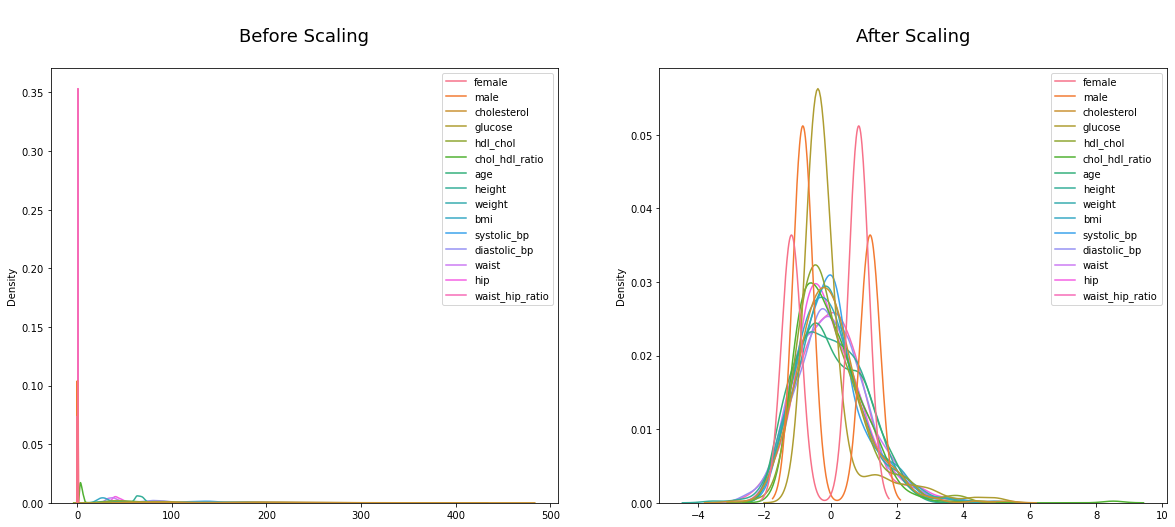

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20,8))

sns.kdeplot(data=X, ax=ax1)
sns.kdeplot(data=scaled, ax=ax2)

ax1.set_title('\nBefore Scaling\n', fontsize=18)
ax2.set_title('\nAfter Scaling\n', fontsize=18)

plt.show();

# Testing dan Training

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = scaled.copy()
# X = X.copy()
y = df['diabetes']

In [28]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)

# Feature selection (jika tidak menggunakan PCA)

## ------K Best------

In [29]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [30]:
univariate = f_classif(X_train, y_train)
univariate

(array([2.25276475e-02, 2.25276475e-02, 1.55508044e+01, 2.77209611e+02,
        4.24384363e+00, 2.74961632e+01, 3.39491946e+01, 1.25443265e-01,
        8.52903868e+00, 8.60481964e+00, 1.44043435e+01, 1.57823371e+00,
        1.77256602e+01, 8.61202713e+00, 8.66356772e+00]),
 array([8.80778633e-01, 8.80778633e-01, 9.70829118e-05, 3.17009456e-46,
        4.01338882e-02, 2.73392002e-07, 1.28638712e-08, 7.23418100e-01,
        3.72250748e-03, 3.57436047e-03, 1.73816134e-04, 2.09855571e-01,
        3.25026375e-05, 3.56058784e-03, 3.46366764e-03]))

In [31]:
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False, inplace=True)

<AxesSubplot:>

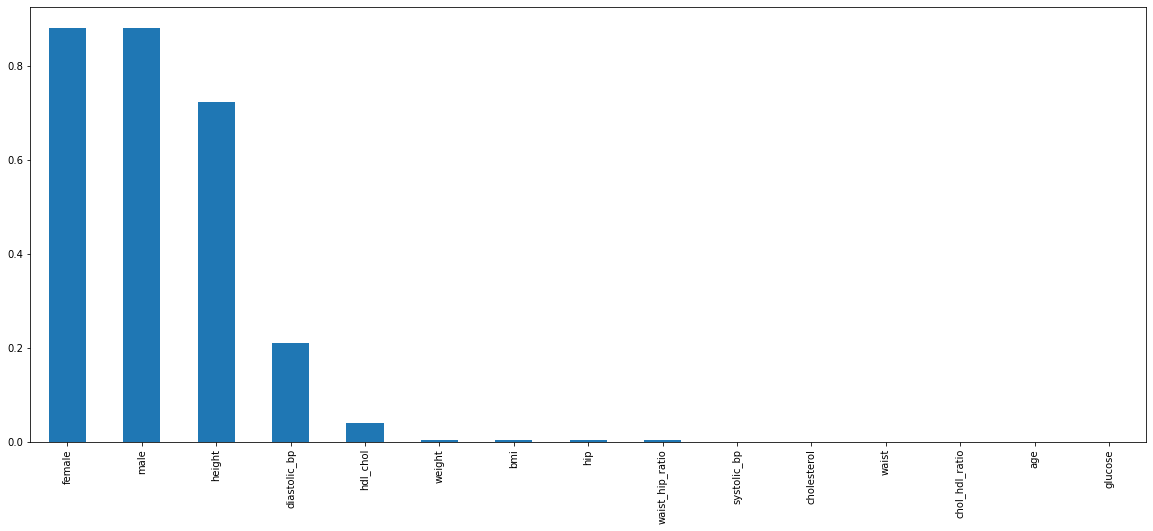

In [32]:
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 8))

## ------Korelasi------

In [33]:
data = pd.concat([X,y],1)
data = data.corr(method='pearson')

<AxesSubplot:>

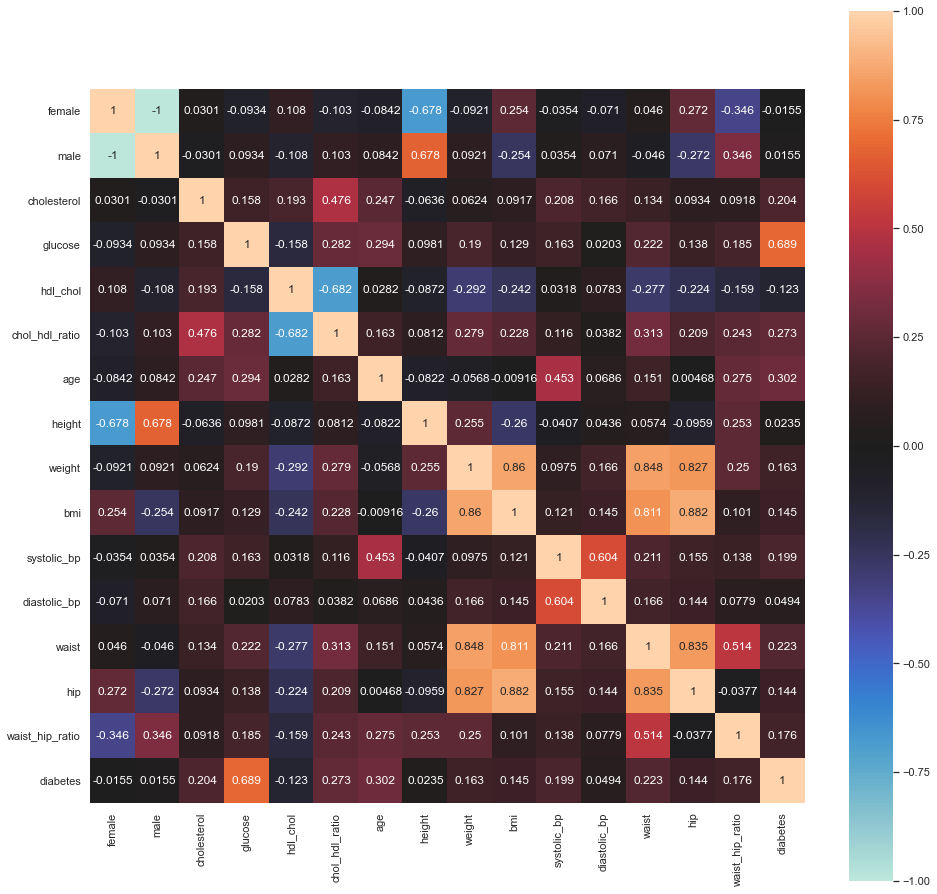

In [34]:
sns.set(rc = {'figure.figsize':(16,16)})
sns.heatmap(data, annot=True, fmt='.3g', vmax=1, vmin=-1, center=0, square=True)

In [35]:
sel_ = SelectKBest(f_classif, k=6).fit(X_train, y_train)
X_train.columns[sel_.get_support()]

Index(['cholesterol', 'glucose', 'chol_hdl_ratio', 'age', 'systolic_bp',
       'waist'],
      dtype='object')

In [36]:
X_train_k_best = sel_.transform(X_train)
# X_train = sel_.transform(X_train)
X_train_k_best.shape

(351, 6)

In [37]:
X_test_k_best = sel_.transform(X_test)
# X_test = sel_.transform(X_test)
X_test_k_best.shape

(39, 6)

# Mencari Parameter Optimal dengan Pipeline

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

## K-Nearest Neighbors

In [39]:
classifier_knn = Pipeline([
     ('pca', PCA()),
     ('model', KNeighborsClassifier()),
    
])

param_grid_knn = {             
               'model__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
               'model__metric': ['euclidean', 'manhattan', 'minkowski'],
               'model__weights': ['uniform', 'distance'],
               'model__p' : [1, 2],
               'pca__n_components' : [i for i in range(1,17)],
#                'pca__whiten': [True, False]
}

clf_knn = GridSearchCV(estimator=classifier_knn,           
                      param_grid=param_grid_knn, 
                      cv=5,
                      return_train_score=True,
                      n_jobs=-1
                  )

clf_knn.fit(X_train, y_train)

print("\nBest estimator:")
print()
print(clf_knn.best_estimator_)


Best estimator:

Pipeline(steps=[('pca', PCA(n_components=9)),
                ('model', KNeighborsClassifier(metric='euclidean', p=1))])


In [40]:
# classifier_knn.get_params().keys()

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [42]:
y_pred_knn_train = clf_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Accuracy Training set: ", accuracy_knn_train)

y_pred_knn_test = clf_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Accuracy Test set: ", accuracy_knn_test)

Accuracy Training set:  0.9259259259259259
Accuracy Test set:  0.8717948717948718


In [43]:
recall_knn_train = recall_score(y_train, y_pred_knn_train)
print("Recall Training set: ", recall_knn_train)

recall_knn_test = recall_score(y_test, y_pred_knn_test)
print("Recall Test set: ", recall_knn_test)

Recall Training set:  0.5294117647058824
Recall Test set:  0.4444444444444444


In [44]:
precision_knn_train = precision_score(y_train, y_pred_knn_train)
print("Precision Training set: ", precision_knn_train)

precision_knn_test = precision_score(y_test, y_pred_knn_test)
print("Precision Test set: ", precision_knn_test)

Precision Training set:  0.9310344827586207
Precision Test set:  1.0


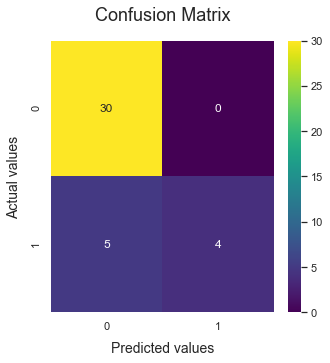

In [45]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, cmap = 'viridis')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# 

## Decisoon Tree

In [46]:
classifier_dt = Pipeline([
    ('pca', PCA()),
    ('model', DecisionTreeClassifier()),
])

param_grid_dt = { 
    'model__criterion': ['entropy','gini'],
    'model__max_depth': np.arange(1,21),
    'model__min_samples_leaf': [1, 5, 10, 20, 50, 100],
    'model__min_samples_split': np.arange(2, 11),
    'pca__n_components' : [i for i in range(1,17)],
#     'pca__whiten': [True, False]
}

clf_dt = GridSearchCV(estimator=classifier_dt, param_grid=param_grid_dt, cv= 5, n_jobs=-1)
clf_dt.fit(X_train, y_train)

print("\nBest estimator:")
print()
print(clf_dt.best_estimator_)


Best estimator:

Pipeline(steps=[('pca', PCA(n_components=10)),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4))])


In [47]:
# classifier_dt.get_params().keys()

In [48]:
y_pred_dt_train = clf_dt.predict(X_train)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Accuracy Training set: ", accuracy_dt_train)

y_pred_dt_test = clf_dt.predict(X_test)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Accuracy Test set: ", accuracy_dt_test)

Accuracy Training set:  0.9401709401709402
Accuracy Test set:  0.7948717948717948


In [49]:
recall_dt_train = recall_score(y_train, y_pred_dt_train)
print("Recall Training set: ", recall_dt_train)

recall_dt_test = recall_score(y_test, y_pred_dt_test)
print("Recall Test set: ", recall_dt_test)

Recall Training set:  0.6078431372549019
Recall Test set:  0.4444444444444444


In [50]:
precision_dt_train = precision_score(y_train, y_pred_dt_train)
print("Precision Training set: ", precision_dt_train)

precision_dt_test = precision_score(y_test, y_pred_dt_test)
print("Precision Test set: ", precision_dt_test)

Precision Training set:  0.96875
Precision Test set:  0.5714285714285714


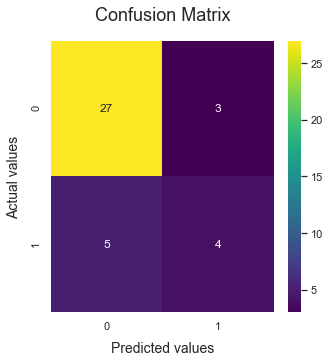

In [51]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# 

## SGD Classifier

In [52]:
classifier_sgd = Pipeline([
    ('pca', PCA()),
    ('model', SGDClassifier()),
])

param_grid_sgd = { 
    'model__loss': ['log', 'hinge', 'modified_huber', 'squared_hinge', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'model__penalty': ['elasticnet', 'l2', 'l1'],
    'model__alpha': [10 ** x for x in range(-6, 1)],
    'model__l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1],
    'pca__n_components' : [i for i in range(1,17)],
#     'pca__whiten': [True, False]
}

clf_sgd = GridSearchCV(estimator=classifier_sgd, param_grid=param_grid_sgd, cv= 5, n_jobs=-1)
clf_sgd.fit(X_train, y_train)

print("\nBest estimator:")
print()
print(clf_sgd.best_estimator_)


Best estimator:

Pipeline(steps=[('pca', PCA(n_components=8)),
                ('model', SGDClassifier(alpha=0.01, l1_ratio=0.2))])


In [53]:
y_pred_sgd_train = clf_sgd.predict(X_train)
accuracy_sgd_train = accuracy_score(y_train, y_pred_sgd_train)
print("Accuracy Training set: ", accuracy_sgd_train)

y_pred_sgd_test = clf_sgd.predict(X_test)
accuracy_sgd_test = accuracy_score(y_test, y_pred_sgd_test)
print("Accuracy Test set: ", accuracy_sgd_test)

Accuracy Training set:  0.9287749287749287
Accuracy Test set:  0.8974358974358975


In [54]:
recall_sgd_train = recall_score(y_train, y_pred_sgd_train)
print("Recall Training set: ", recall_sgd_train)

recall_sgd_test = recall_score(y_test, y_pred_sgd_test)
print("Recall Test set: ", recall_sgd_test)

Recall Training set:  0.6078431372549019
Recall Test set:  0.7777777777777778


In [55]:
precision_sgd_train = precision_score(y_train, y_pred_sgd_train)
print("Precision Training set: ", precision_sgd_train)

precision_sgd_test = precision_score(y_test, y_pred_sgd_test)
print("Precision Test set: ", precision_sgd_test)

Precision Training set:  0.8611111111111112
Precision Test set:  0.7777777777777778


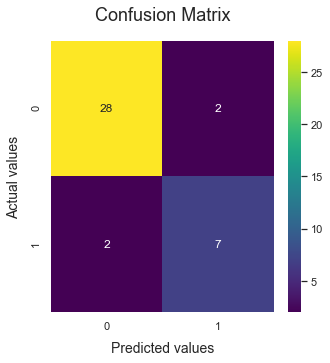

In [56]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_sgd_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# 

## Logistic Regression

In [57]:
classifier_lr = Pipeline([
    ('pca', PCA()),
    ('model', LogisticRegression(random_state=30)),
])

param_grid_lr = {
               'model__solver': ['newton-cg', 'lbfgs','sag', 'saga', 'liblinear'],
               'model__C':[0.5,1,1.5,2,2.5],
               'model__class_weight':[None,'balanced'],
               'model__max_iter':[1000,2000,3000],
               'model__penalty':[None, 'l1','l2', 'elasticnet'],
               'model__intercept_scaling' : [True, False],
               'pca__n_components' : [i for i in range(1,17)],
#                'pca__whiten': [True, False]
}

clf_lr = GridSearchCV(estimator=classifier_lr, param_grid=param_grid_lr, cv= 5, n_jobs=-1)
clf_lr.fit(X_train, y_train)

print("\nBest estimator:")
print()
print(clf_lr.best_estimator_)


Best estimator:

Pipeline(steps=[('pca', PCA(n_components=8)),
                ('model',
                 LogisticRegression(C=0.5, intercept_scaling=True,
                                    max_iter=1000, random_state=30,
                                    solver='liblinear'))])


In [58]:
# classifier_lr.get_params().keys()

In [59]:
y_pred_lr_train = clf_lr.predict(X_train)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Accuracy Training set: ", accuracy_lr_train)

y_pred_lr_test = clf_lr.predict(X_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Accuracy Test set: ", accuracy_lr_test)

Accuracy Training set:  0.9230769230769231
Accuracy Test set:  0.9487179487179487


In [60]:
recall_lr_train = recall_score(y_train, y_pred_lr_train)
print("Recall Training set: ", recall_lr_train)

recall_lr_test = recall_score(y_test, y_pred_lr_test)
print("Recall Test set: ", recall_lr_test)

Recall Training set:  0.5686274509803921
Recall Test set:  0.8888888888888888


In [61]:
precision_lr_train = precision_score(y_train, y_pred_lr_train)
print("Precision Training set: ", precision_lr_train)

precision_lr_test = precision_score(y_test, y_pred_lr_test)
print("Precision Test set: ", precision_lr_test)

Precision Training set:  0.8529411764705882
Precision Test set:  0.8888888888888888


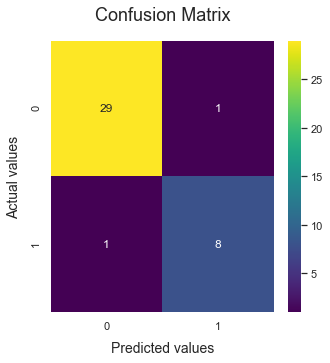

In [62]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# 

# 

In [63]:
models = [
          ('Decision Tree', accuracy_dt_train, accuracy_dt_test),
          ('K-Nearest Neighbors', accuracy_knn_train, accuracy_knn_test),
          ('SGD Classifier', accuracy_sgd_train, accuracy_sgd_test),
          ('Logistic Regression', accuracy_lr_train, accuracy_lr_test)
         ]

In [64]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Decision Tree,0.940171,0.794872
1,K-Nearest Neighbors,0.925926,0.871795
2,SGD Classifier,0.928775,0.897436
3,Logistic Regression,0.923077,0.948718


In [65]:
models_comparison = [
                        ('Decision Tree', accuracy_dt_test, recall_dt_test, precision_dt_test),
                        ('K-Nearest Neighbors', accuracy_knn_test, recall_knn_test, precision_knn_test),
                        ('SGD Classifier', accuracy_sgd_test, recall_sgd_test, precision_sgd_test),
                        ('Logistic Regression', accuracy_lr_test, recall_lr_test, precision_lr_test)
                    ]

In [66]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Decision Tree,0.794872,0.444444,0.571429
1,K-Nearest Neighbors,0.871795,0.444444,1.000000
2,SGD Classifier,0.897436,0.777778,0.777778
3,Logistic Regression,0.948718,0.888889,0.888889


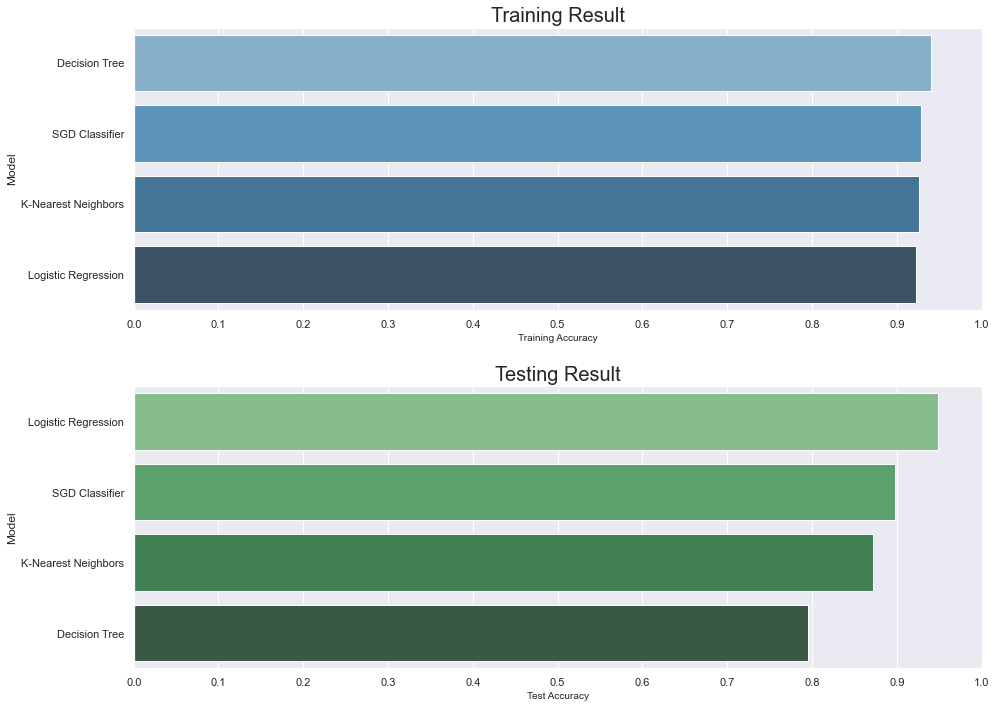

In [67]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy\n', size=10)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))
axes[0].set_title('Training Result', fontsize=20)

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=10)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))
axes[1].set_title('Testing Result', fontsize=20)

plt.tight_layout()
plt.show()